In [1]:
import pandas as pd
import numpy as np
import scipy
import warnings
import seaborn as sns
import math
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data_adjprice_part2.csv')
df.head(1)

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,20060720,33.8369,62.9,20.2457,43.6416,33.56,NaN,69.7,49.8218,NaN,...,NaN,308100.0308,13.0207,NaN,49.9288,NaN,68.4627,NaN,NaN,NaN


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y%m%d')
start, end = '2017-1-1' , '2017-12-31'
df = df[(df['Date'] >= start) & (df['Date'] <= end)] #slice the df, so we only consider 2018

In [4]:
df.dropna(axis = 1, inplace = True)
df.reset_index(inplace = True, drop =True)

In [5]:
df

,Date,A US Equity,AA US Equity,AAL US Equity,AAP US Equity,AAPL US Equity,ABBV US Equity,ABC US Equity,ABMD US Equity,ABT US Equity,...,XOM US Equity,XRAY US Equity,XRX US Equity,XYL US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZION US Equity,ZTS US Equity
0,2017-01-01,44.8490,28.08,45.8477,168.541,112.3010,58.1480,75.5216,112.68,36.8635,...,83.4901,57.0649,21.6324,48.3152,13.28,61.4355,25.8581,101.7467,41.7802,52.8318
1,2017-01-02,44.8490,28.08,45.8477,168.541,112.3010,58.1480,75.5216,112.68,36.8635,...,83.4901,57.0649,21.6324,48.3152,13.28,61.4355,25.8581,101.7467,41.7802,52.8318
2,2017-01-03,45.7644,28.83,45.4647,170.016,112.6210,57.9530,79.7908,112.36,37.4777,...,84.0728,57.9447,25.9213,48.4421,13.54,61.3191,25.9769,101.8748,41.9161,52.8910
3,2017-01-04,46.3649,30.26,45.8575,171.411,112.4949,58.7701,81.7708,115.74,37.7752,...,83.1478,58.4191,26.8994,49.1641,14.14,61.5422,26.3530,102.8115,42.5179,53.4042
4,2017-01-05,45.8137,30.65,45.0621,171.291,113.0670,59.2158,80.8243,114.81,38.1016,...,81.9083,57.6580,26.7866,48.7153,13.85,61.7459,26.7193,103.4720,41.8287,53.2266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,66.6991,51.84,51.8983,99.640,168.0766,94.4085,91.0247,190.42,56.4357,...,80.5614,65.5450,28.4178,67.4304,14.71,81.3177,39.8837,119.1535,49.7199,72.0207
361,2017-12-28,66.8478,54.14,51.9578,99.580,168.5495,94.1198,91.0149,190.55,56.4259,...,80.6766,66.0296,28.6317,67.4502,14.54,81.5841,40.3700,120.9920,50.3376,71.9611
362,2017-12-29,66.5190,53.87,51.5319,99.560,166.7269,93.0803,90.2580,187.41,56.0429,...,80.3117,65.4332,28.3401,67.4008,14.38,80.5380,39.7150,119.9187,49.8376,71.6131
363,2017-12-30,66.5190,53.87,51.5319,99.560,166.7269,93.0803,90.2580,187.41,56.0429,...,80.3117,65.4332,28.3401,67.4008,14.38,80.5380,39.7150,119.9187,49.8376,71.6131


In [6]:
#Calc ROI, Volitility & Sharp Ratio
calc_df =  df.drop(columns = 'Date') # remove datetime variable for calculations
ROI = (calc_df[-1:].values - calc_df[:1].values)/calc_df[:1] #profit/start price
Volitility = calc_df.std()/calc_df[:1] #how much it has moved from the start price
Sharpe  = ROI/Volitility #Risk free = 0

In [7]:
Sharpe

,A US Equity,AA US Equity,AAL US Equity,AAP US Equity,AAPL US Equity,ABBV US Equity,ABC US Equity,ABMD US Equity,ABT US Equity,ABX US Equity,...,XOM US Equity,XRAY US Equity,XRX US Equity,XYL US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZION US Equity,ZTS US Equity
0,3.193253,4.313605,1.794109,-2.39301,3.571228,2.727801,2.72474,2.734873,3.667892,-0.830025,...,-1.577245,2.397891,3.578214,2.636666,0.650599,3.099247,2.467345,3.378375,2.761815,3.07366


In [8]:
sharpe_sorted = [(Sharpe.columns[i], Sharpe.values.flatten()[i]) for i in range(len(Sharpe.columns))]
sharpe_sorted = sorted(sharpe_sorted, key = lambda x: x[1], reverse= True)
top_50 = sharpe_sorted[:50]
top_50[:10]

[('LM US Equity', 5.038677832069963),
 ('LOW US Equity', 4.863452352032186),
 ('TIF US Equity', 4.843593103383508),
 ('CLX US Equity', 4.680904177017623),
 ('CSX US Equity', 4.671439464476428),
 ('EMR US Equity', 4.671247529580641),
 ('ILMN US Equity', 4.344673218889137),
 ('AA US Equity', 4.313605265819196),
 ('ARNC US Equity', 4.277256250011823),
 ('HD US Equity', 4.2674948051997115)]

In [9]:
top_50_df= df[[str(col) for col in np.array(top_50).T[0]]]
top_50_df.shape

(365, 50)

The efficient frontier is found by minimizing $w^{T}\Sigma w-q*R^{T}w$, where:

* $w$ is a vector of portfolio weights and 

* $\sum _{i}w_{i}=1$ . (The weights can be negative, which means investors can short a security.);

* $\Sigma$ is the covariance matrix for the returns on the assets in the portfolio;

* $q\geq 0$ is a "risk tolerance" factor, where 0 results in the portfolio with minimal risk and $\infty $ results in the portfolio infinitely far out on the frontier with both expected return and risk unbounded; and

* $R$ is a vector of expected returns.

* $w^{T}\Sigma$ w is the variance of portfolio return.

* $R^{T}w$ is the expected return on the portfolio.

*Modern Portfolio Theory Wikipedia*

In [10]:
#Create a portfolio using 20 stocks from the dataframe
folio_names = top_50_df.iloc[0].sample(n= 20, random_state = 2)
folio = df[[str(col) for col in folio_names.index]]
folio.head(3)


,MHK US Equity,TXN US Equity,BBY US Equity,HD US Equity,LEN US Equity,LM US Equity,PGR US Equity,MAR US Equity,PPG US Equity,BF/B US Equity,CSCO US Equity,ROK US Equity,LEN/B US Equity,RSG US Equity,SHW US Equity,FBHS US Equity,MAS US Equity,TIF US Equity,RJF US Equity,PH US Equity
0,199.68,69.3705,40.8721,128.931,42.5939,28.3375,34.1299,80.6699,91.717,34.4818,28.3163,129.239,33.5762,55.0361,263.822,52.2965,30.9113,74.7949,67.8651,135.4078
1,199.68,69.3705,40.8721,128.931,42.5939,28.3375,34.1299,80.6699,91.717,34.4818,28.3163,129.239,33.5762,55.0361,263.822,52.2965,30.9113,74.7949,67.8651,135.4078
2,201.75,69.9504,40.9583,129.152,42.5840,29.0860,34.1587,80.4943,92.191,34.6047,28.6161,133.220,33.6541,54.8625,269.516,52.7171,31.5076,75.1427,68.2668,137.8742


In [11]:
#Create random weights 
np.random.seed(2)
weights = np.random.rand(1,20).flatten()
weights =  weights/weights.sum()
weights

array([0.05051711, 0.00300398, 0.06368735, 0.05043919, 0.04870646,
       0.03827467, 0.02371188, 0.07175263, 0.03471987, 0.03091629,
       0.07196847, 0.06130973, 0.01559328, 0.05950639, 0.02137036,
       0.09099387, 0.09894695, 0.05726539, 0.09808793, 0.00922823])

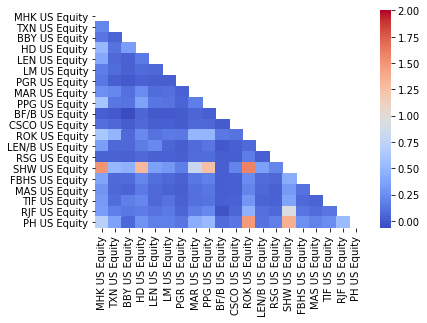

In [12]:
#find daily returns on assests
daily_return  = folio.diff(periods = 1, axis = 0) #note 0 change when market is closed then opens 
sns.heatmap(daily_return.cov(), mask = np.triu(daily_return.cov()), cmap = 'coolwarm', vmax =2)

In [13]:
#Create functions for scipy.optimize.minimize
def gain(df): #Profit 
    return ((df[-1:].values - df[:1].values)/df[:1]).values.flatten()
#func
def eff_front(weights):
    
    #calculate risk
    variance = weights.T @ daily_return.cov() @ weights
    risk = math.sqrt(variance)
   
    #Expected Returns from start of the year to end of the year
    ROI  =  gain(folio)
    #Weighted Expected Return
    weighted_ROI = ROI.T @ weights
    
    return (variance - (tolerance * weighted_ROI)) # negative since max = -min 
#constraints as dict 
def constraint(X):
    initial  = np.ones(X.shape)
    return (initial @ X.T) -1
#bound
bound = np.tile((0,1),(len(weights),1))

cons = ({'type': 'eq', 'fun': constraint})

#x0 = initial random weights = weights 

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Variance')

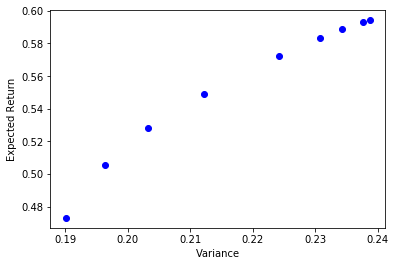

In [15]:
ROI  = gain(folio)
for tolerance in np.arange(.05, .50, .05):
    optimised = scipy.optimize.minimize(eff_front, weights, bounds= bound, constraints =  cons).x
    
    plt.plot(np.sqrt(optimised.T @ daily_return.cov() @ optimised),ROI @ optimised,'o', color = 'blue')
plt.ylabel('Expected Return')
plt.xlabel('Variance')

In [17]:
#compare ROI and variance in tolerance of 20%
tolerance = .2
initial_weighted_ROI =  weights @ gain(folio)
optimised_weights  = scipy.optimize.minimize(eff_front, weights, bounds= bound, constraints =  cons).x
optimised_weighted_ROI = optimised_weights @ gain(folio)

print('Return: ', optimised_weighted_ROI, initial_weighted_ROI)
print('Variance: ', optimised_weights.T @ daily_return.cov() @ optimised_weights, weights.T @ daily_return.cov() @ weights)


Return:  0.5490536060021068 0.41910096840091404
Variance:  0.04502514872981933 0.19816366861714738
